# Fitting wells

This notebook introduces the concept of fitting wells and how they are used in `gwrefpy`. The methodology originates from the description by its author [Strandanger (2024)](https://svenskageotekniskaforeningen.se/wp-content/uploads/Publikationer/SGF_Rapporter/2024_2_Akvifars_refmetod.pdf).

This notebook can be downloaded from the source code [here](https://github.com/andersretznerSGU/gwrefpy/blob/main/docs/user_guide/2_fitting_wells.ipynb).

To analyse deviations in groundwater level timeseries, the `gwrefpy` methodology relies on observation wells and reference wells. To check for deviations in an observation well, we fit its data to a reference well using regression. When fitting the two wells, we specify a calibration period. If data outside of the calibration period does not follow the fitted regression, a deviation has occurred. 

In this notebook, we will dive deeper into the fitting workflow and showcase this library's associated capabilities.

```{note}
See [this notebook on wells](https://github.com/andersretznerSGU/gwrefpy/blob/main/docs/user_guide/2_fitting_wells.ipynb)
```


In [1]:
import gwrefpy as gr
import matplotlib.pyplot as plt
gr.set_log_level("ERROR")

## Data

In this notebook, we will work with data provided by `gwrefpy`. Let's load the model using its file name and plot the observation wells and reference wells separately.

In [2]:
model = gr.Model("small_example.gwref")


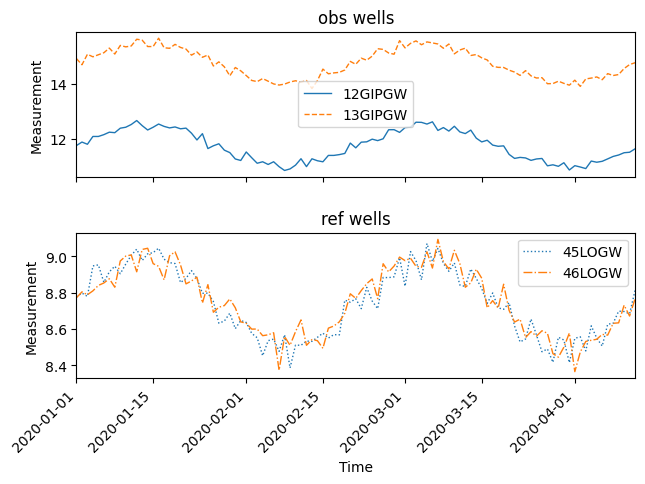

In [3]:
fig, (up, down) = plt.subplots(nrows=2, sharex=True)
model.plot_wells(model.obs_wells, ax=up)
model.plot_wells(model.ref_wells, ax=down)

up.set_title("obs wells")
down.set_title("ref wells")

up.legend()
down.legend()

fig.autofmt_xdate(rotation=45)

## Anatomy of a fit

Let's walk through the anatomy of a fit by fitting the observation well _12GIPGW_ to the reference well _45LOGW_. To fit wells within a model, we call `model.fit()` which has the following signature:

In [4]:
help(model.fit)

Help on method fit in module gwrefpy.fitbase:

fit(obs_well: gwrefpy.well.Well | list[gwrefpy.well.Well] | str | list[str], ref_well: gwrefpy.well.Well | list[gwrefpy.well.Well] | str | list[str], offset: pandas._libs.tslibs.offsets.DateOffset | pandas._libs.tslibs.timedeltas.Timedelta | str, aggregation: Literal['mean', 'median', 'min', 'max'] = 'mean', p: float = 0.95, method: Literal['linearregression'] = 'linearregression', tmin: pandas._libs.tslibs.timestamps.Timestamp | str | None = None, tmax: pandas._libs.tslibs.timestamps.Timestamp | str | None = None, report: bool = True) -> gwrefpy.fitresults.FitResultData | list[gwrefpy.fitresults.FitResultData] method of gwrefpy.model.Model instance
    Fit reference well(s) to observation well(s) using regression.
    
    Parameters
    ----------
    obs_well : Well | list[Well] | str | list[str]
        The observation well(s) to use for fitting. Can be Well objects,
        well names (strings), or lists of either. If a list is provid

The first two arguments determine which wells to use. 

The `offset` and `aggregation` arguments handle cases where the timeseries of the wells are not aligned, see [this notebook](). The wells in this model are sampled daily and cover the same period, which means we can use `"0D"` as the offset which also renders the `aggregation` argument obsolete.

The `p` argument controls which confidence level to use when evaluating the lower and upper bound from which to recognize deviations. We will use the default `p`-value.

Currently, `gwrefpy` supports the linear regression fit as demonstrated in [Strandanger (2024)](https://svenskageotekniskaforeningen.se/wp-content/uploads/Publikationer/SGF_Rapporter/2024_2_Akvifars_refmetod.pdf), which is what we will cover in this notebook. Linear regression is currently the only available method, which is why we don't have to explicitly pass it.

Let's do this!

In [5]:
model.fit(
    obs_well="12GIPGW",
    ref_well="45LOGW",
    offset="0D",
)

Statistic,Value,Description
RMSE,0.1794,Root Mean Square Error
R²,0.8891,Coefficient of Determination
R-value,0.9429,Correlation Coefficient
Slope,2.7861,Linear Regression Slope
Intercept,-12.6035,Linear Regression Intercept
P-value,0.0000,Statistical Significance
N,103,Number of Data Points
Std Error,0.1812,Standard Error
Confidence,95.0%,Confidence Level


By default when calling `fit()`, a summary of the fitted regression is displayed as seen above.